## Queue

### queue and FIFO Data Structure


#### Leetcode 622. Design Circular Queue
* Overview
  + Design your implementation of the circular queue. The circular queue is a linear data structure in which the operations are performed based on FIFO (First In First Out) principle, and the last position is connected back to the first position to make a circle. It is also called "Ring Buffer".
  + One of the benefits of the circular queue is that we can make use of the spaces in front of the queue. In a normal queue, once the queue becomes full, we cannot insert the next element even if there is a space in front of the queue. But using the circular queue, we can use the space to store new values.
  + Implement the MyCircularQueue class:
    + MyCircularQueue(k) Initializes the object with the size of the queue to be k.
    + int Front() Gets the front item from the queue. If the queue is empty, return -1.
    + int Rear() Gets the last item from the queue. If the queue is empty, return -1.
    + boolean enQueue(int value) Inserts an element into the circular queue. Return true if the operation is successful.
    + boolean deQueue() Deletes an element from the circular queue. Return true if the operation is successful.
    + boolean isEmpty() Checks whether the circular queue is empty or not.
    + boolean isFull() Checks whether the circular queue is full or not.
  + You must solve the problem without using the built-in queue data structure in your programming language
  
* Algorithm
  + implement using an array/list
    + the implementation is easier than linkedlist, since we can track the start and end index to check if list is full
    + set head and tail pointers, and initialize both to -1
    + when enqueue
      + if the list is full, return False
      + check if this is the first element by self.head==-1, if so, set head = 0
      + increment self.tail by one mod by capacity, and set self.list(tail) = value
      + increment size by 1
      + return True
    + when deque
      + if the list is empty, return False
      + if head and tail point to the same index, there is only one element, set both head and tail to -1
      + otherwise, increment head by 1 mod by capacity, and decrease size by 1
      + return True
    + isEmpty
      + return self.head == -1
    + isFull
      + return self.size == self.capacity
    + Front
      + if isEmpty(), return -1
      + otherwise return self.list(self.head)
    + Rear
      + if isEmpty(), return -1
      + otherwise return self.list(self.tail)
  + implement by linked list
    + we need to maintain a self.size to keep track of the empty and full status of the list
    + initialize head and tail to point to None
    + when enqueue
      + if list is full, return False
      + for the first element, create a new Node and point head and tail to it
      + otherwise, link the node to tail.next, and set tail = tail.next, 
      + self.size += 1
      + return True
    + when dequeue
      + if the list is empty, return False
      + set head = head.next
      + decrease size by 1
      + return True
    + isEmpty
      + return self.head is None
    + isFull
      + return self.size == self.capacity

In [1]:
class MyCircularQueue:

    # initialize the list to store elements
    # with a fixed size of k, and set start
    # and end indexes to -1 for empty list
    def __init__(self, k: int):                
        self.capacity = k
        self.list = [0] * self.capacity
        self.start = -1
        self.tail = -1
        

    # first check if the list is full, if so
    # return False. Then check if the list is
    # empty, if so, set start to 0. Increment
    # tail pointer and assign the value to tail
    def enQueue(self, value: int) -> bool:
        if self.isFull():
            return False

        if self.isEmpty():
            self.start = 0
        self.tail = (self.tail + 1) % self.capacity
        self.list[self.tail] = value 
        return True     

    # first check if the list is empty, if so
    # return False. Then check if the list contains
    # only one element, if so, set start and tail
    # to -1. Otherwise, advance start pointer by 1
    # and return True
    def deQueue(self) -> bool:
        if self.isEmpty():
            return False 

        if self.start == self.tail:
            self.start = -1
            self.tail = -1
        else:
            self.start = (self.start + 1) % self.capacity
        return True            
        

    # if the list is empty, return -1. Otherwise
    # return the value of start element value
    def Front(self) -> int:
        if self.isEmpty():
            return -1

        return self.list[self.start]    
        

    # if the list is empty, return -1. Otherwise
    # return the tail element value
    def Rear(self) -> int:
        if self.isEmpty():
            return -1
        return self.list[self.tail]
        

    # return start == -1
    def isEmpty(self) -> bool:
        return self.start == -1        

    
    # if the tail and start pointers are next to
    # each other, then we have a full list
    def isFull(self) -> bool:
        return (self.tail + 1) % self.capacity == self.start
        



# Your MyCircularQueue object will be instantiated and called as such:
# obj = MyCircularQueue(k)
# param_1 = obj.enQueue(value)
# param_2 = obj.deQueue()
# param_3 = obj.Front()
# param_4 = obj.Rear()
# param_5 = obj.isEmpty()
# param_6 = obj.isFull()

# implement by linked list
class Node:
    def __init__(self, val: int):
        self.val = val
        self.next = None
        
class MyCircularQueue:

    def __init__(self, k: int):
        self.capacity = k
        self.size = 0
        self.head = None
        self.tail = None
        

    def enQueue(self, value: int) -> bool:
        if self.isFull():
            return False
        
        # set head and tail to the same node for the first node
        if self.isEmpty():
            self.head = Node(value)
            self.tail = self.head
        else:
            # otherwise, link the new node to the tail
            self.tail.next = Node(value)            
            self.tail = self.tail.next 
        
        self.size += 1
        return True
        

    def deQueue(self) -> bool:
        if self.isEmpty():
            return False
        
        # set head to point to its next to delete the head node
        # note that the queue is not empty
        self.head = self.head.next
        self.size -= 1
        return True          
        

    def Front(self) -> int:
        if self.isEmpty():
            return -1
        return self.head.val
        

    def Rear(self) -> int:
        if self.isEmpty():
            return -1
        
        return self.tail.val
        

    def isEmpty(self) -> bool:
        return self.head is None
        

    def isFull(self) -> bool:
        return self.size == self.capacity

#### Leetcode 346. Moving Average from Data Stream
* Overview
  + Given a stream of integers and a window size, calculate the moving average of all integers in the sliding window.
  + Implement the MovingAverage class:
    + MovingAverage(int size) Initializes the object with the size of the window size.
    + double next(int val) Returns the moving average of the last size values of the stream.
* Algorithm
  + use deque
  + in next(val), if len(self.q) == self.size, q.popleft()
  + then q.append(val) and return sum(q) / len(q)

In [2]:
from collections import deque
class MovingAverage:

    def __init__(self, size: int):
        self.size = size
        self.q = deque()

    def next(self, val: int) -> float:
        if len(self.q) == self.size:
            self.q.popleft()
            
        self.q.append(val)
        return sum(self.q) / len(self.q)

### Queue and BFS
* shortest path
  + Similar to tree's level-order traversal, the nodes closer to the root node will be traversed earlier.
  + If a node X is added to the queue in the kth round, the length of the shortest path between the root node and X is exactly k. That is to say, you are already in the shortest path the first time you find the target node.
* BFS template
  + we initialize step = 0, and increment step by 1 for each layer traversal
  + if node.val == target, return step
  + if the graph has cyclic and we don't want to have infinite loop, we can use a set to store visited nodes. so we will only add un-visited nodes to the queue to avoid this

#### Leetcode 286. Walls and Gates
* Overview
  + You are given an m x n grid rooms initialized with these three possible values.
    + -1 A wall or an obstacle.
    + 0 A gate.
    + INF Infinity means an empty room. We use the value 2^31 - 1 = 2147483647 to represent INF as you may assume that the distance to a gate is less than 2147483647.
  + Fill each empty room with the distance to its nearest gate. If it is impossible to reach a gate, it should be filled with INF.
* Algorithm
  + BFS algorithm
  + we first collect all the i, j coordinates where rooms(i, j) == 0, and append them to deque
  + set step = 0
  + while q
    + use layer by layer traversal
    + popleft i, j and for each move, get x, y
    + if x, y are valid and rooms(x, y) = 2^31 - 1, assign rooms(x, y) = step + 1
    + increment step by 1 after each layer iteration
  + note that we don't need to use the set to store the visited positions, since only unvisited cell will have the value of 2^31 -1, and we only add these cells to q 

In [5]:
from collections import deque
class Solution:
    def wallsAndGates(self, rooms: List[List[int]]) -> None:
        """
        Do not return anything, modify rooms in-place instead.
        """
        if not rooms or not rooms[0]:
            return []
        
        m, n = len(rooms), len(rooms[0])
        
        INF = (1 << 31) - 1
            
        q = deque()        
        
        # initialize the q and visited set by i, j where rooms[i][j] == 0
        for i in range(m):
            for j in range(n):
                if rooms[i][j] == 0:
                    q.append((i, j))
                    
        # define moves for BFS
        moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]   
        
        # initialize the step to zero
        step = 0
        
        while q:
            # use layer by layer traversal
            # increment the step after each traversal
            size = len(q)
            for _ in range(size):
                i, j = q.popleft()
                for move in moves:
                    x, y = i + move[0], j + move[1]
                    if -1 < x < m and -1 < y < n and rooms[x][y] == INF:
                        # the neighbors of the current iteration has a step+1 distance
                        # to the gate
                        rooms[x][y] = step + 1
                        
                        q.append((x, y))
            step += 1            

#### Leetcode 200. Number of Islands
* Overview
  + Given an m x n 2D binary grid grid which represents a map of '1's (land) and '0's (water), return the number of islands.
  + An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.
* Algorithm
  + DFS
    + using DFS to connect all the neighboring cells whose values are 1 by adding them to visited set
    + traverse the grid, and increment the number of islands when a cell has a value of 1 and not been visited
    + return the number of islands 
  + BFS
    + using BFS to connect all the neighbouring cells whose values are 1 by changing the cell value to 0
    + traverse the grid, and increment the number of islands when a cell has value of 1
    + return the number of islands

In [22]:
# implementation by DFS

from typing import List
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        if not grid or not grid[0]:
            return 0
        
        m, n = len(grid), len(grid[0])
        visited = set()
        moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        
        # dfs connects all the neighboring cells whose value is 1
        # by adding them to the visited set
        def dfs(i: int, j:int) -> None:
            visited.add((i, j))
            
            for move in moves:
                x, y = i + move[0], j + move[1]
                if -1 < x < m and -1 < y < n and (x, y) not in visited and grid[x][y] == "1":
                    dfs(x, y)
            
        
        rs = 0
        for i in range(m):
            for j in range(n):
                if grid[i][j] == "1" and (i, j) not in visited:
                    rs += 1
                    dfs(i, j)
                    
        return rs         
    
# implementation of BFS
from collections import deque
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        if not grid or not grid[0]:
            return 0
        
        m, n = len(grid), len(grid[0])
        
        moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        
        # dfs connects all the neighboring cells whose value is 1
        # by adding them to the visited set
        def bfs(i: int, j:int) -> None:
            q = deque([(i, j)])
            grid[i][j] ="0" 
           
            while q:
                i, j = q.popleft()                               
                for move in moves:
                    x, y = i + move[0], j + move[1]
                    if -1 < x < m and -1 < y < n and grid[x][y] == "1":
                        q.append((x, y))
                        grid[x][y] ="0" 
                   
        rs = 0
        for i in range(m):
            for j in range(n):
                if grid[i][j] == "1":                    
                    rs += 1
                    bfs(i, j)                   
        
        return rs                       

#### Leetcode 752. Open the Lock
* Overview
  + You have a lock in front of you with 4 circular wheels. Each wheel has 10 slots: '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'. The wheels can rotate freely and wrap around: for example we can turn '9' to be '0', or '0' to be '9'. Each move consists of turning one wheel one slot.
  + The lock initially starts at '0000', a string representing the state of the 4 wheels.
  + You are given a list of dead ends, meaning if the lock displays any of these codes, the wheels of the lock will stop turning and you will be unable to open it.
  + Given a target representing the value of the wheels that will unlock the lock, return the minimum total number of turns required to open the lock, or -1 if it is impossible.
* Algorithm
  + DFS algorithm
  + first define get_digits(digits: str) function to return all the 8 possible digits by rotating one of the digits in both directions
  + add deadends to visited set to block these digits
  + set up the layer by layer traversal template
  + if a digits popleft from q equals target, return step
  + otherwise, traverse the digits from get_digits() function, and if the digits are not in visited, add it to visited and q
  + increment step after the for loop for each layer traverse
  + return -1 out of the while loop in layer by layer traversal
* time complexity
  + O(N^2A^N)
  + O(N^2) because in get\_digits function, we traverse N digits, and for each iteration, we have substring operations, so its N^2
  + O(A^N) because we may explore all possible combinations of 1-9 for N digit positions
* space complexity
  + O(NA^N)
  + store all the combinations in set

In [9]:
from typing import List
class Solution:
    def openLock(self, deadends: List[str], target: str) -> int:
        if "0000" in deadends:
            return -1
        
        # get all the possible digits by rotating one of the digits
        def get_digits(digits: str) -> List[str]:
            rs = []
            
            for i in range(4):
                digit = int(digits[i])
                add = str((digit + 1) % 10)
                sub = str((digit -1) % 10)
                rs.append(digits[:i] + add + digits[i+1:])
                rs.append(digits[:i] + sub + digits[i+1:])
            return rs
        
        # set up queue and add all deadend digits to visited set
        q = deque(["0000"])
        visited = set(deadends)
                
        # apply the layer by layer traversal template
        step = 0
        while q:
            size = len(q)
            for _ in range(size):                
                digits = q.popleft()
                if digits == target:
                    return step
                
                for next_digit in get_digits(digits):
                    if next_digit not in visited:
                        visited.add(next_digit)
                        q.append(next_digit)
            step += 1
        return -1   
                

#### Leetcode 279. Perfect Squares
* Overview
  + Given an integer n, return the least number of perfect square numbers that sum to n.
  + A perfect square is an integer that is the square of an integer; in other words, it is the product of some integer with itself. For example, 1, 4, 9, and 16 are perfect squares while 3 and 11 are not.
* Algorithm (DP)
  + set the squares list with all possible square values
  + set the dp array of zeros with n+1 elements
  + traverse from index 1 to n, and find the min(\[dp(i-s) for s in squares if s <=i\]) + 1
  + return dp(n)
* time complexity
  + O(N^3/2) each time we traverse all squares which is of N^(1/2)
* space complexity
  + O(N)
* Algorithm (BFS)
  + set the squares list with all possible square values
  + set the deque for layer by layer traversal
  + set visited set to eliminate duplications when traversing. Otherwise, we will get memory limit exceed error
  + apply layer by layer traversal template
 
* time complexity
  + < O(N^3/2) each time we traverse all squares which is of N^(1/2), and in worst case, we have to accumulate by incrementing 1
* space complexity
  + < O(N^3/2) 

In [10]:
# DP implementation
class Solution:
    def numSquares(self, n: int) -> int:
        if n == 1:
            return 1
        
        squares = [i* i for i in range(1, int(sqrt(n))+1)]
                
        dp = [0] * (n+1)
        
        # traverse each index i from 1 to n
        # find the min from dp[i-square] where square <= i and add 1
        for i in range(1, n+1):
            dp[i] = min([dp[i-square] for square in squares if square <= i ]) + 1
            
        # return dp[n]
        return dp[n]    
            
        
# BFS implementation
class Solution:
    def numSquares(self, n: int) -> int:
        if n == 1:
            return 1
        
        squares = [i* i for i in range(1, int(sqrt(n))+1)]
                
        q = deque(squares)
        step = 1
        # use set to eliminate duplicated values in layer traversal
        visited = set()
        
        # layer by layer traversal template
        while q:
            size = len(q)
            for _ in range(size):                
                curr = q.popleft()
                if curr == n:
                    return step

                for square in squares:
                    value = square + curr
                    if value <= n and value not in visited:                    
                        q.append(value)
                        visited.add(value)
            step += 1

#### Leetcode 155. Min Stack
* Overview
  + Design a stack that supports push, pop, top, and retrieving the minimum element in constant time.
  + Implement the MinStack class:
    + MinStack() initializes the stack object.
    + void push(int val) pushes the element val onto the stack.
    + void pop() removes the element on the top of the stack.
    + int top() gets the top element of the stack.
    + int getMin() retrieves the minimum element in the stack.
  + You must implement a solution with O(1) time complexity for each function.
* Alogrithm
  + use two stacks. One for current values, the other for min values
  + when adding new elements
    + if min stack is empty, or current val < min stack's top element, push \[val, 1\] to min stack
    + if min  stack's top element == current val, update min stack's top element by incrementing count by 1
  + when deleting elements
    + if the top elements of stack and min stack have the same value, we need to pop up the min stack top element. Therefore, decrement count of min stack top element by 1, and if the count is zero, pop the min stack top element
    + otherwise, the top element value in stack will be bigger than min stack top element, ignore min stack update
    + pop the top element from stack
  + return top element from stack and min stack when quering the top element from stack and min stack, respectively  

In [1]:
# implementation using double stack, one for current value, one for min value

from typing import List
class MinStack:

    def __init__(self):
        self.stack = []
        self.min_stack = []
        

    # push the current val and update the min stack 
    # if current val < min_stack[-1][0], push [val, 1] to min_stack
    # if current val == min_stack[-1][0], increase the count
    # otherwise, don't need to modify min_stack, because the min
    # value will be just used and we only pop/update min value
    # either when current value <= min value in min_stack
    def push(self, val: int) -> None:
        self.stack.append(val)
        
        if not self.min_stack or val < self.min_stack[-1][0]:
            self.min_stack.append([val, 1])
            return 
        if self.min_stack[-1][0] == val:
            self.min_stack[-1][1] += 1        

    # same logic, only when current_val == min_stack value
    # we update the count of min, and pop min if count is 0
    def pop(self) -> None:
        if self.stack[-1] == self.min_stack[-1][0]:
            self.min_stack[-1][1] -= 1
            if self.min_stack[-1][1] == 0:
                self.min_stack.pop()
        self.stack.pop()        

    def top(self) -> int:
        return self.stack[-1]

    # return min value from min_stack
    def getMin(self) -> int:
        return self.min_stack[-1][0]        


# Your MinStack object will be instantiated and called as such:
# obj = MinStack()
# obj.push(val)
# obj.pop()
# param_3 = obj.top()
# param_4 = obj.getMin()

# A simplier implementation by updating min_stack and stack at the same time
class MinStack:

    def __init__(self):
        self.stack = []
        self.min_stack = []
        

    # push the current val and the min value
    ## so far to self.stack and self.min_stack
    def push(self, val: int) -> None:
        self.stack.append(val)
        
        if not self.min_stack:
            self.min_stack.append(val)
        else:
            self.min_stack.append(min(self.min_stack[-1], val))        

    # pop both stacks to make them synchronous
    def pop(self) -> None:
        if self.stack and self.min_stack:
            self.stack.pop()
            self.min_stack.pop()        

    def top(self) -> int:
        return self.stack[-1]

    def getMin(self) -> int:
        return self.min_stack[-1]   

#### Leetcode 20. Valid Parentheses
* Overview
  + Given a string s containing just the characters '(', ')', '{', '}', '\[' and '\]', determine if the input string is valid.
  + An input string is valid if:
    + Open brackets must be closed by the same type of brackets.
    + Open brackets must be closed in the correct order.
    + Every close bracket has a corresponding open bracket of the same type.
* Algorithm
  + traverse the characters in the string
  + if the character is a opening parathesis, push it to the stack
  + if the character is a closing parathesis, top element popped from stack must match this character
    + if the stack is empty or top element dosen't match, return False
  + after traversal, the stack must be empty for s to be valid
* Time complexity
  + O(N) linear scanning of the string s
* Space complexity
  + O(N). use stack to store the characters of string s (half of the characters)

In [ ]:
class Solution:
    def isValid(self, s: str) -> bool:
        if not s:
            return True
        
        opens = {'(', '{', '['}
        pairs = {'()', '{}', '[]'}
        
        stack = []
        
        for c in s:
            if c in opens:
                stack.append(c)
            else:
                # closing parathesis must match the top element of stack
                if not stack or stack.pop() + c not in pairs:
                    return False
        
        # stack must be empty to make s valid
        return len(stack) == 0        

#### Leetcode 739. Daily Temperatures
* Overview
  + Given an array of integers temperatures represents the daily temperatures, return an array answer such that answer[i] is the number of days you have to wait after the ith day to get a warmer temperature. If there is no future day for which this is possible, keep answer\[i\] == 0 instead.
* Algorithm
  + use a stack and traverse from the end of the list
  + if stack is not empty and the top element is <= current element, pop the stack until the top element > current element, output the distance between the indicdes of the top element and current element. Otherwise, use the default value of zero
* Time complexity
  + O(N) traverse the list once
* Space complexity
  + O(N) 
  + use stack to store the element indices

In [12]:
class Solution:
    def dailyTemperatures(self, temperatures: List[int]) -> List[int]:
        if not temperatures:
            return []
        
        stack = []
        n = len(temperatures)
        rs = [0] * n
        
        # traverse from the end of the temperature list
        # keep popping the items from stack if the top element <= current
        # element. The first element > current is the one nearest
        # output the distance to the corresponding index position
        for i in range(n-1, -1, -1):
            while stack and temperatures[stack[-1]] <= temperatures[i]:
                stack.pop()
            if stack:
                rs[i] = stack[-1] - i
            stack.append(i)
            
        return rs     

#### Leetcode 150. Evaluate Reverse Polish Notation
* Overview
  + You are given an array of strings tokens that represents an arithmetic expression in a Reverse Polish Notation.
  + Evaluate the expression. Return an integer that represents the value of the expression.
  + 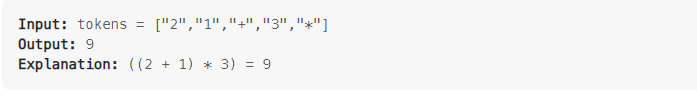
  + Note that:
    + The valid operators are '+', '-', '*', and '/'.
    + Each operand may be an integer or another expression.
    + The division between two integers always truncates toward zero.
    + There will not be any division by zero.
    + The input represents a valid arithmetic expression in a reverse polish notation.
    + The answer and all the intermediate calculations can be represented in a 32-bit integer.
* Algorithm
  + use stack to store numbers
  + when token is an operator, pop from stack and complemete the calculation 
  + get the sum of stack and return
* Time complexity
  + O(N)
  + linear scanning of expression
* Space complexity
  + O(N)
  + store the nubmers and intemediate calculated results

In [20]:
from typing import List

class Solution:
    def evalRPN(self, tokens: List[str]) -> int:
        if not tokens:
            return 0
        
        operators = {"+", "-", "*", "/"}
        stack = []
        
        for token in tokens:
            if token in operators:
                rs = 0
                second, first  = stack.pop(), stack.pop()
                if token == "+":
                    rs = first + second
                if token == "-":
                    rs = first - second
                if token == "*":
                    rs = first * second
                if token == "/":
                    rs = int(abs(first)/abs(second))
                    rs = rs if first/second > 0 else -rs
                stack.append(rs) 
            else:
                stack.append(int(token))
        return sum(stack)                            

#### Leetcode 133. Clone Graph
* Oveview
  + Given a reference of a node in a connected undirected graph.
  + Return a deep copy (clone) of the graph.
  + Each node in the graph contains a value (int) and a list (`List[Node]`) of its neighbors.
  + An adjacency list, which is given in the problem, is a collection of unordered lists used to represent a finite graph. Each list describes the set of neighbors of a node in the graph.
  + the value of the node will be the value of the 1-based index of the node, which is also given as node.val property
  + The given node will always be the first node with val = 1. You must return the copy of the given node as a reference to the cloned graph.
  + Note that all the nodes are connected in the graph! We don't need to define val and neighbors of the original nodes. We only need to traverse the graph and create the copies of the nodes according to the nodes' properties stored in nodes
  +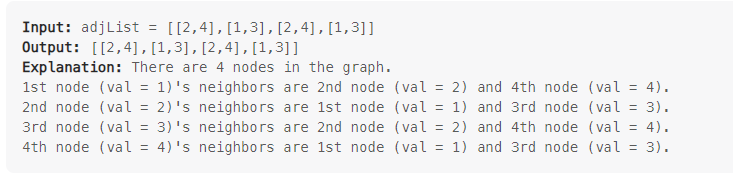
* Algorithm
  + using dfs to explore all nodes in the connected graph, create copies of nodes and map original and copied nodes by a dictionary
  + traverse the original nodes in node map, and their neighbors and add the neighbors of each copied node
* time complexity
  + O(N)
  + traverse each nodes
* space complexity
  + O(N)
  + store each node and its copy

In [2]:
# Definition for a Node.
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []

class Solution:
    def cloneGraph(self, node: 'Node') -> 'Node':
        if node is None:
            return None
        node_map = dict()
        
        # use dfs to tranverse the connected graph,
        # obtain each distinct node, create copies of each node
        # and store them in node_map using original and cloned 
        # nodes as keys and values, respectively
        def dfs(node: 'Node') -> None:
            node_map[node] = Node(node.val)
            for ng in node.neighbors:
                if ng not in node_map:
                    dfs(ng)
                    
        dfs(node) 
        
        # traverse the nodes, and add neighbors to the copied nodes
        for n in node_map:
            for nb in n.neighbors:
                node_map[n].neighbors.append(node_map[nb])
                
        # return the copy of input node
        return node_map[node]        
                

#### Leetcode 494. Target Sum
* Overview
  + You are given an integer array nums and an integer target.
  + You want to build an expression out of nums by adding one of the symbols '+' and '-' before each integer in nums and then concatenate all the integers.
    + For example, if nums = \[2, 1\], you can add a '+' before 2 and a '-' before 1 and concatenate them to build the expression "+2-1".
  + Return the number of different expressions that you can build, which evaluates to target.
* Algorithms
  + recursion + memoization
    + use index and total as the state variables. The value is the number of ways we can get target along this path
    + if index == n, then if total == 0, return 1 (we get a valid answer) ,or return 0
    + for i in (-1, 1), recursively call `rs += backtrack(index+1, total - i * nums[index])`
    + time complexity
      + O(tn) where t is the sum of the nums array and n is the length of nums, as these are the state varialbes
    + space complexity  
      + O(tn). same as time complexity, t and n are state variables
  + 2d DP
    + the two-d array basically follows the same logic as in recrusion + memoization
    + since the total can be ranged from -1000 to 1000, we need to do shift the index so that index 1000 corresponds to 0, and -1000 corresponds to index 0
    + we initialize a dp have n rows (n is the length of nums), and 2001 columns
    + as in recursion solution, we first traverse from nums(0), and we know there is 1 solution for index == 0 and values of `nums[0]`, but for `-nums[0]`, we use `dp[0][-nums[0]] += 1`. This is to handle the edge case where nums(0) == 0, then when total == 0, there will be 2 ways by adding or subtracting 0
    + we then check if `dp[i-1][j+total]` >0 , if so, we update `dp[i][total+j+nums[i]]` and `dp[i][total+j-nums[i]]` by incrementing them by `dp[i-1][j+total]`
    + finally return `dp[n-1][total+taget]`
    + instead of using the hardcoded 1000, we can also use sum of nums. We know target will be in the range of `[-sum, sum]` by the restriction of the question. 
      + we can directly return 0 if abs(target) > abs(sum(nums))

In [4]:
from typing import List

# 2d DP by utilizing the restriction that abs(target) will be <= abs(sum(nums))
class Solution:
    def findTargetSumWays(self, nums: List[int], target: int) -> int:
        n = len(nums)
        col_width = 1000
        total = abs(sum(nums))
        if abs(target) > total:
            return 0
        
        dp = [[0] * (2* total + 1) for _ in range(n)]
        
        # shift column index by total to accomodate results
        # obtained by minus nums elements
        dp[0][total+nums[0]] = 1
        
        # if nums[0] == 0, we update the cell by
        # incrementing it by 1. Otherwise, just
        # set dp[0][total-nums[0]] as 1
        dp[0][total-nums[0]] += 1
        
        for i in range(1, n):
            num = nums[i]
            for j in range(-total + num, total -num + 1):
                value = dp[i-1][total+j]
                if value > 0:
                    dp[i][total+j+num] += value
                    dp[i][total+j-num] += value
                    
        return dp[n-1][total+target]            
        
# recursion + memoization
class Solution:
    def findTargetSumWays(self, nums: List[int], target: int) -> int:
        n = len(nums)
        
        @lru_cache(None)
        def backtrack(index: int, total: int) -> int:
            if index == n:
                if total == 0:
                    return 1
                return 0
            
            rs = 0
            for i in (1, -1):
                rs += backtrack(index+1, total-i * nums[index])
            return rs
        
        return backtrack(0, target)       

#### Iterative implementation of DFS
```java
    /*
     * Return true if there is a path from cur to target.
     */
    boolean DFS(int root, int target) {
        Set<Node> visited;
        Stack<Node> stack;
        add root to stack;
        while (stack is not empty) {
            Node cur = the top element in stack;
            remove the cur from the stack;
            return true if cur is target;
            for (Node next : the neighbors of cur) {
                if (next is not in visited) {
                    add next to visited;
                    add next to stack;
                }
            }
        }
        return false;
    }
```

### Conclusion

#### Leetcode 232. Implement Queue using Stacks
* Overview
  + Implement a first in first out (FIFO) queue using only two stacks. The implemented queue should support all the functions of a normal queue (push, peek, pop, and empty).
  + Implement the MyQueue class:
    + void push(int x) Pushes element x to the back of the queue.
    + int pop() Removes the element from the front of the queue and returns it.
    + int peek() Returns the element at the front of the queue.
    + boolean empty() Returns true if the queue is empty, false otherwise.
  + Notes:
    + You must use only standard operations of a stack, which means only push to top, peek/pop from top, size, and is empty operations are valid.
    + Depending on your language, the stack may not be supported natively. You may simulate a stack using a list or deque (double-ended queue) as long as you use only a stack's standard operations.
* Algorithm (double stacks)
  + the idea is to pop elements from a stack and push them to another other. The order of the elements in the second stack will be consistent with the order in a queue
  + initialize a read and write stack
  + when new element comes, push it to write stack
  + for pop and peak operation, first check is read stack is empty. If it is, continuously pop elements from write and push them to read, and then read/pop the top element from read stack. Otherwise, directly read/pop from the read stack
* time complexity
  + push: O(1) append elements to write
  + pop and peak: O(N) worst case if read stack is empty
  + isEmpty: O(1)
* space complexity
  + O(N)
  + maintaining read and write stacks   

In [24]:
class MyQueue:

    def __init__(self):
        self.read = []
        self.write = []
        
    def refill(self) -> None:
        if self.read:
            return
        while self.write:
            self.read.append(self.write.pop())
    
    def push(self, x: int) -> None:
        self.write.append(x)        

    def pop(self) -> int:
        self.refill()
        return self.read.pop()        

    def peek(self) -> int:
        self.refill()
        return self.read[-1]        

    def empty(self) -> bool:
        return not self.read and not self.write        


# Your MyQueue object will be instantiated and called as such:
# obj = MyQueue()
# obj.push(x)
# param_2 = obj.pop()
# param_3 = obj.peek()
# param_4 = obj.empty()

#### Leetcode 225. Implement Stack using Queues
* Overview
  + Implement a last-in-first-out (LIFO) stack using only two queues. The implemented stack should support all the functions of a normal stack (push, top, pop, and empty).
  + Implement the MyStack class:
    + void push(int x) Pushes element x to the top of the stack.
    + int pop() Removes the element on the top of the stack and returns it.
    + int top() Returns the element on the top of the stack.
    + boolean empty() Returns true if the stack is empty, false otherwise.
  + Notes:
    + You must use only standard operations of a queue, which means that only push to back, peek/pop from front, size and is empty operations are valid.
    + Depending on your language, the queue may not be supported natively. You may simulate a queue using a list or deque (double-ended queue) as long as you use only a queue's standard operations.
* Algorithm
  + use one deque
  + push O(N)
    + if queue is empty, append element to queue
    + if queue is not empty, append the element to queue, and popleft elements then append the popped element to the end of the queue for n-1 times, where n is the length of the queue
  + peek and pop
    + return or pop and return the top element from the queue

In [25]:
from collections import deque
class MyStack:

    def __init__(self):
        self.q = deque()
        

    # if queue is empty, append the element and return
    # otherwise, pop and append all the elements before the
    # last pushed element after it
    def push(self, x: int) -> None:
        if not self.q:
            self.q.append(x)
            return
        self.q.append(x)
        for _ in range(len(self.q)-1):
            self.q.append(self.q.popleft())        

    def pop(self) -> int:
        return self.q.popleft() 
        

    def top(self) -> int:
        return self.q[0]
        

    def empty(self) -> bool:
        return not self.q
        


# Your MyStack object will be instantiated and called as such:
# obj = MyStack()
# obj.push(x)
# param_2 = obj.pop()
# param_3 = obj.top()
# param_4 = obj.empty()

#### Leetcode 394. Decode String
* Overview
  + Given an encoded string, return its decoded string.
  + The encoding rule is: k\[encoded_string\], where the encoded_string inside the square brackets is being repeated exactly k times. Note that k is guaranteed to be a positive integer.
  + You may assume that the input string is always valid; there are no extra white spaces, square brackets are well-formed, etc. Furthermore, you may assume that the original data does not contain any digits and that digits are only for those repeat numbers, k. For example, there will not be input like 3a or 2\[4\].
  + The test cases are generated so that the length of the output will never exceed 105.
  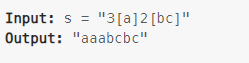
* Algorithm
  + This is a stack problem. The problem asks to parse a string containing numbers and letters. The numbers corresponds to the times that letters included in parathesis will repeat. The solution parses the input string with the following rules:
    +. if current char is a number, use digit routine to get the entire number block, and push to digits stack
    +. if current char is a letter, the concatenate the char to current string, rs
    +. if curent char is left paraenthesis, then push rs to char stack, which is initialized as "", therefore, the first time when rs is pushed to stack is ""
    +. if current char is right paraenthesis, then pop up tmp from char stack, and pop up the number n from digit stack, repeat rs for n times and concatenate to tmp. Note that if at the end of the string, there is not a right paraenthesis, the rs will still be catenated with the new chars from the expression with the right result
* Time complexity:
  + O(nk) where k is the max of all the k values in the expression, and n is the length of the expression. We will need to copy at max k times of the substrings to the results
* Space complexity:
  + O(m + n) where m, n are the nubmer of numbers and letters, respectively. This is because we use two stack, one for numbers, and the other for letters 

In [5]:
class Solution:
    def decodeString(self, s: str) -> str:
        if not s:
            return ""
        
        index = 0
        n = len(s)
        rs = ""
        nums = []
        chars = []
        
        while index < n:
            # push the number to the nums stack
            if s[index].isdigit():
                tmp = ""
                while index < n and s[index].isdigit():
                    tmp += s[index]
                    index += 1
                nums.append(int(tmp)) 
            # push the current rs to stack, and re-initialize rs
            elif s[index] == '[':
                chars.append(rs)
                rs = ""
                index += 1
            # construct new rs
            elif s[index] == "]":
                print(f'index={index}, nums={nums}, chars={chars}, rs={rs}')
                rs = chars.pop() + rs * nums.pop()
                index += 1
            # continue to add rs
            else:
                rs += s[index]
                index += 1
                
        return rs    
    
# a simpler implementation, but a little bit slower
class Solution:
    def decodeString(self, s: str) -> str:
        if not s:
            return ""

        rs = ""
        times = 0
        times_stack = []
        str_stack = []

        for c in s:
            if c.isdigit():
                times = times * 10 + int(c)
            elif c == "[":
                times_stack.append(times)
                str_stack.append(rs)
                times = 0
                rs = ""
            elif c == "]":
                rs = str_stack.pop() + rs * times_stack.pop() 
            else:
                rs += c

        return rs    

#### Leetcode 733. Flood Fill
* Overview
  + An image is represented by an m x n integer grid image where image\[i\]\[j\] represents the pixel value of the image.
  + You are also given three integers sr, sc, and color. You should perform a flood fill on the image starting from the pixel image\[sr\]\[sc\].
  + To perform a flood fill, consider the starting pixel, plus any pixels connected 4-directionally to the starting pixel of the same color as the starting pixel, plus any pixels connected 4-directionally to those pixels (also with the same color), and so on. Replace the color of all of the aforementioned pixels with color.
  + Return the modified image after performing the flood fill.
* Algorithm
  + dfs to find all the neighnoring cells with the original color as (sr, sc) and modify to new color
  + if original color == new color, return image
* time complexity
  + O(N) dfs to traverse all cells
* space complexity
  + O(N) for recursive stack

In [6]:
from typing import List
class Solution:
    def floodFill(self, image: List[List[int]], sr: int, sc: int, color: int) -> List[List[int]]:
        if not image:
            return None
        
        m, n = len(image), len(image[0])
        original_color = image[sr][sc]
        # check if original_color == color, return the image
        if original_color == color:
            return image
        
        moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        
        # use dfs to add i, j to visited and change color
        # traverse its neighbors and recursively call neighbors
        # if image[x][y] == original_color. Note that color != original_color
        def dfs(i: int, j: int) -> None:           
            image[i][j] = color
            
            for move in moves:
                x, y = i + move[0], j + move[1]
                if -1< x < m and -1< y < n and image[x][y] == original_color:
                    dfs(x, y)
                    
        dfs(sr, sc)
        return image       

#### Leetcode 542. 01 Matrix
* Overview
  + Given an m x n binary matrix mat, return the distance of the nearest 0 for each cell.
  + The distance between two adjacent cells is 1.
  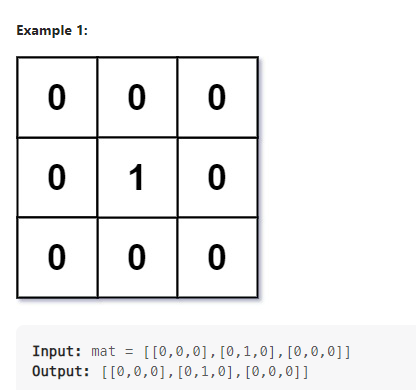
* Algorithm
  + bfs
    + collect all i, j where mat(i, j) == 0 and push them to the queue
    + use layer by layer traversal template and for each element popped from the queue, assign step value to it
    + return mat
    + time complexity
      + O(MN) where M and N are the numbers of row and columns of mat
    + space complexity
      + O(MN) we may need to store all the cells in queue
  + dp
    + use 2d dp. 
    + scan from top left, and find the min distance from non-zero elements' top and left neighbors + 1
    + scan from bottom right, and find the min distance from non-zero elements' bottom and right neighbors+1
    + time complexity and space complexity
      + O(MN)

In [28]:
from typing import List

# dfs implementation
from collections import deque
class Solution:
    def updateMatrix(self, mat: List[List[int]]) -> List[List[int]]:
        m, n = len(mat), len(mat[0])
        moves = [(0, 1), (0, -1), (-1, 0), (1, 0)]
        
        rs = [[0] * n for _ in range(m)]      
        q = deque()
        
        # collect all zero elements and add to queue
        for i in range(m):
            for j in range(n):
                if mat[i][j] == 0:
                    q.append((i, j))
                    
        visited = set(q)
        
        # since all zeros are in queue, step is the shortest distance
        # from a non-zero element to the nearest zero element
        step = 0

        # use BFS to find the distance to zero elements for all non-zero elements
        while q:
            size = len(q)
            for _ in range(size):
                i, j = q.popleft()
                if mat[i][j] != 0:
                    mat[i][j] = step
                
                for move in moves:
                    x, y = i + move[0], j + move[1]
                    if -1 < x < m and -1 < y < n and (x, y) not in visited:
                        q.append((x, y))
                        visited.add((x, y))
            # increment distance
            step += 1       
                    
        return mat            


#### Leetcode 841. Keys and Rooms
* Overview
  + There are n rooms labeled from 0 to n - 1 and all the rooms are locked except for room 0. Your goal is to visit all the rooms. However, you cannot enter a locked room without having its key.
  + When you visit a room, you may find a set of distinct keys in it. Each key has a number on it, denoting which room it unlocks, and you can take all of them with you to unlock the other rooms.
  + Given an array rooms where rooms\[i\] is the set of keys that you can obtain if you visited room i, return true if you can visit all the rooms, or false otherwise.
* Algorithm
  + dfs to traverse each room where the keys are available in the corresponding rooms starting from room 0
  + each time, add the visited room number to visited set
  + finally, return len(visited) == len(rooms)
* time complexity
  + O(N) where N is the number of rooms
* space complexity
  + O(N)

In [3]:
from typing import List
class Solution:
    def canVisitAllRooms(self, rooms: List[List[int]]) -> bool:
        
        visited = set()
        
        def dfs(i: int) -> None:
            visited.add(i)
            
            for j in rooms[i]:
                if j not in visited:
                    dfs(j)
        dfs(0)
        return len(visited) == len(rooms)
        